In [1]:
import pandas as pd
import numpy as np
import sys
import re
import string
import os,time

import seaborn as sns
import matplotlib.pyplot as plt

import pydicom as dcm
sns.reset_orig

<function seaborn.rcmod.reset_orig()>

In [2]:
Trloc=r"C:/Users/dheer/covid-19/train"
Tsloc=r"C:/Users/dheer/covid-19/test"

In [3]:
display((T_I:=pd.read_csv(r"C:\Users\dheer\covid-19\train_image_level.csv")).head())
display((T_S:=pd.read_csv(r"C:\Users\dheer\covid-19\train_study_level.csv")).head())

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


In [4]:
T_I['id']=T_I['id'].apply(lambda x:x.split('_')[0])
T_S['id']=T_S['id'].apply(lambda x:x.split('_')[0])
T_S.rename(columns={'id':'StudyInstanceUID'},inplace=True)

In [5]:
(T_M:=pd.merge(T_I,T_S,on='StudyInstanceUID')).head()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0


In [6]:
T_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 0 to 6333
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        6334 non-null   object
 1   boxes                     4294 non-null   object
 2   label                     6334 non-null   object
 3   StudyInstanceUID          6334 non-null   object
 4   Negative for Pneumonia    6334 non-null   int64 
 5   Typical Appearance        6334 non-null   int64 
 6   Indeterminate Appearance  6334 non-null   int64 
 7   Atypical Appearance       6334 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 445.4+ KB


In [16]:
def getdcm(l):
    try:
        s=os.listdir(Trloc+'/'+l)[0]
        m=os.listdir(Trloc+'/'+l+'/'+s)[0]
        mloc='/'.join([Trloc,l,s,m])
        x=dcm.dcmread(mloc)
        y=x.pixel_array
        z=plt.imshow(y,cmap="gray")
        return {'Train_Data':x,'PArray':y,'Image':z}
    except FileNotFoundError:
        s=os.listdir(Tsloc+'/'+l)[0]
        m=os.listdir(Tsloc+'/'+l+'/'+s)[0]
        mloc='/'.join([Tsloc,l,s,m])
        x=dcm.dcmread(mloc)
        y=x.pixel_array
        z=plt.imshow(y,cmap="gray")
        return {'Test_Data':x,'PArray':y,'Image':z}

{'Test_Data': Dataset.file_meta -------------------------------
 (0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.167729340708164311758760056246984788366
 (0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
 -------------------------------------------------
 (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
 (0008, 0016) SOP Class UID                       UI: 71228e4340de
 (0008, 0018) SOP Instance UID                    UI: ced40f593496
 (0008, 0020) Study Date                          DA: '62c414094c4d'
 (0008, 0030) Study Time                          TM: '81e8f70b4918'
 (0008, 0050) Accession Number                    SH: '4107d38e45ea'
 (0008, 0060) Modality                            CS: 'DX'
 (0010, 0010) Patient's Name               

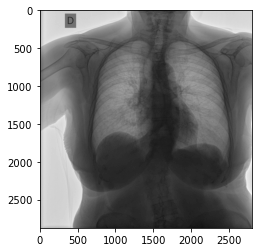

In [19]:
getdcm("00a81e8f1051")